# Pymaceuticals Inc.
---

### Analysis

- Based on the final analysis of the data from the Treatments is that Capomulin and Ramican seem to be the most effective to reduce the growth of tumors within the mice.
- As seen in the last graph of the analysis there is a positive correlation between the the average tumor volume and weight for the Capomulin
- While infunobil was seen as a top performer within the top 4 drugs analyzed it had an outlier that skews the data more favorably towards itself and when taken out it is one of the least effective as seen in the boxplot that compares the top 4 drug treatments.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on= 'Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
mouse_counts = merged_df['Mouse ID'].nunique()
mouse_counts

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_id['Mouse ID'].unique()

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_df.loc[(merged_df['Mouse ID'] == 'g989')]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merged_df.drop(merged_df[merged_df['Mouse ID'] == 'g989'].index, inplace=True)


In [10]:
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.

mouse_counts = merged_df['Mouse ID'].nunique()
mouse_counts

248

Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = merged_df.groupby('Drug Regimen')
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_var = summary_df['Tumor Volume (mm3)'].var()
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

summary_series_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean, 'Median Tumor Volume': tumor_median, 
                                'Variance Tumor Volume': tumor_var, 'Tummor Volume Std. Var.': tumor_std, 'Tumor Volume Std. Err.': tumor_sem})

summary_series_df


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tummor Volume Std. Var.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df_agg = summary_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem'],})
summary_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_df = merged_df['Drug Regimen'].value_counts()

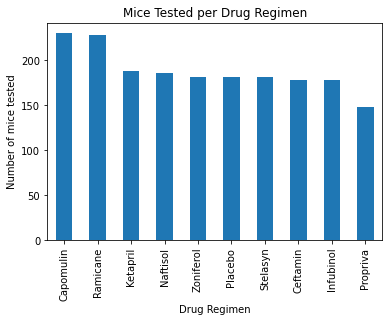

In [16]:

regimen_df.plot(kind='bar',
                title='Mice Tested per Drug Regimen'
                )
plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice tested')
plt.show()


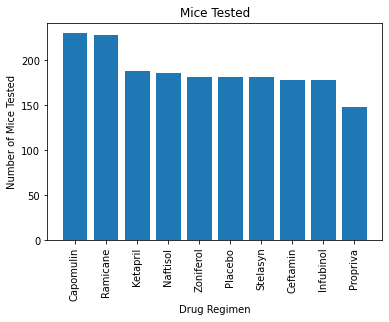

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(regimen_df.index.values, regimen_df.values)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Mice Tested")
plt.show()
plt.tight_layout()

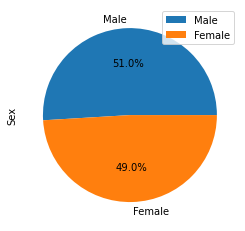

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = merged_df['Sex'].value_counts()
sex_count.plot(kind='pie', autopct="%1.1f%%", legend=True)

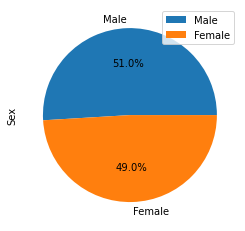

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count.values, labels=sex_count.index.values, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.legend()

Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_max = merged_df.groupby("Mouse ID")

timepoint_max = timepoint_max["Timepoint"].max()

timepoint_df = pd.DataFrame(timepoint_max)

merged_max_df = pd.merge(timepoint_df, merged_df, on=['Mouse ID', 'Timepoint'])
merged_max_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [33]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_list = []
for treatment in treatment_list:
    temp_list = []

    for index, mouse in merged_max_df.iterrows():
        if mouse['Drug Regimen'] == treatment:
            temp_list.append(mouse['Tumor Volume (mm3)'])
    

    temp_list.sort()
    tumor_vol_list.append(temp_list)
    temp_list = pd.DataFrame(temp_list)
    

    quartiles = temp_list.quantile([.25,.5,.75])
    lowerq = quartiles[0][0.25]
    iqr = quartiles[0][0.75]-quartiles[0][0.25]
    lower_bound = quartiles[0][0.25] - (1.5*iqr)
    upper_bound = quartiles[0][0.75] + (1.5*iqr)
    outliers = [lower_bound, upper_bound]
    print(f'Values below {lower_bound} or above {upper_bound} could be outliers')
    print(f"{treatment}'s potential outliers:{outliers}")

Values below 20.70456164999999 or above 51.83201549 could be outliers
Capomulin's potential outliers:[20.70456164999999, 51.83201549]
Values below 17.912664470000003 or above 54.30681135 could be outliers
Ramicane's potential outliers:[17.912664470000003, 54.30681135]
Values below 36.83290494999999 or above 82.74144559000001 could be outliers
Infubinol's potential outliers:[36.83290494999999, 82.74144559000001]
Values below 25.355449580000002 or above 87.66645829999999 could be outliers
Ceftamin's potential outliers:[25.355449580000002, 87.66645829999999]


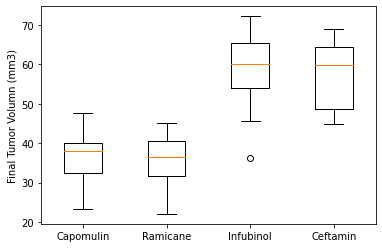

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list, labels=treatment_list)
ax1.set_ylabel('Final Tumor Volumn (mm3)')
plt.show()

Line and Scatter Plots

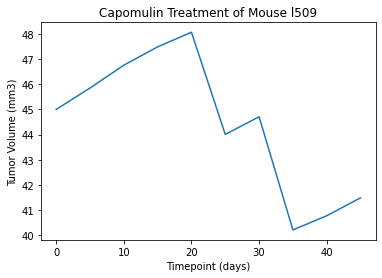

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

merged_max_df.loc[merged_max_df["Drug Regimen"] == "Capomulin"].head
l509_tumor = merged_df.loc[merged_df["Mouse ID"]=="l509"]
plt.plot(l509_tumor["Timepoint"],l509_tumor["Tumor Volume (mm3)"], color = "tab:blue")
plt.title("Capomulin Treatment of Mouse l509", fontsize = 12)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

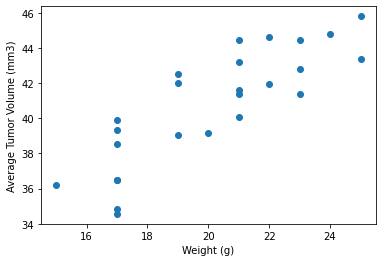

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = merged_df.loc[merged_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


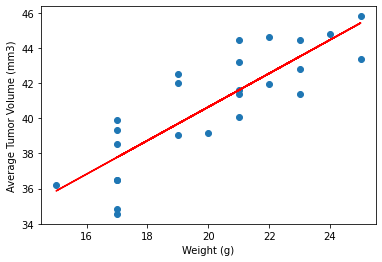

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()
